## Load Stuff

In [11]:
import torch
from mario_gpt import MarioDataset, MarioLM, TrainingConfig, MarioGPTTrainer
from mario_gpt.utils import view_level, convert_level_to_png, join_list_of_list, characterize
from mario_gpt.flower_level import FLOWER_LEVEL


import numpy as np
import matplotlib.pyplot as plt

from IPython.display import clear_output

from mario_gpt.fos_dataset import FosDataset


In [12]:
#---
# load model and generate flowers
#---
img_length = 28
height = 35

# Check if a CUDA-compatible GPU is available and use it
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

mario_lm = MarioLM(lm_path="../FosGPT_wfc0", tokenizer_path="../FosGPT_wfc0")
mario_lm.to(device)

dataset = FosDataset(mario_lm.tokenizer, level_string='/home/gaiera/Code/NZB/tile_gen/data/fos_wfc.json') # for token conversion and reference levels


Using ../FosGPT_wfc0 lm
Using ../FosGPT_wfc0 tokenizer





Token indices sequence length is longer than the specified maximum sequence length for this model (19609800 > 1024). Running this sequence through the model will result in indexing errors


wait


In [16]:
# Generate a level
prompts = [" "]
generated_level = mario_lm.sample(
    prompts=prompts,
    num_steps=(height*img_length),
    temperature=1.0,
    use_tqdm=True
)
clear_output()

In [14]:
#print(generated_level)

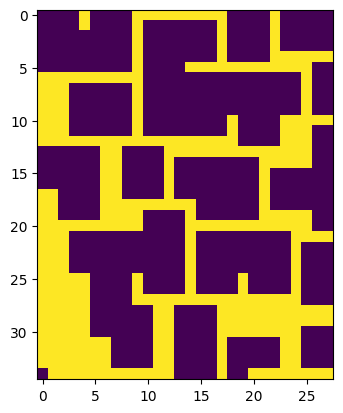

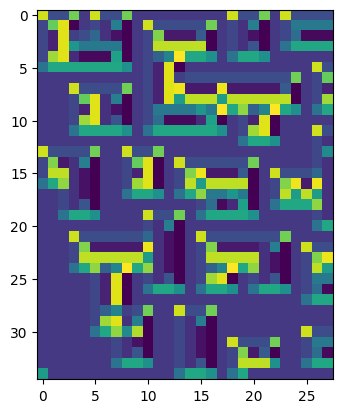

In [15]:
def view_level(level, length=img_length , height=height):
    A = np.rot90(np.reshape(level, [length,height]))
    plt.imshow(A==40)
    plt.show()
    plt.imshow(A)
    
view_level(generated_level.level_tensor)